loading a h5 file and plotting the SED, need to run EAZY Test to get the outputs, and update the param file

In [17]:
import eazy.hdf5
import glob

In [45]:
# setup files

field = 'cdfs' #'cdfs', 'cosmos', or 'uds'

output_directory = f'outputs/{field}/test_2/{field}_test_2_normal_[]_True' # output directory for images
h5_file = f'{output_directory}.h5'
param_file = 'base.param'
translate_file = glob.glob(f'zfourge/{field}/eazy/{field}.*.translate')

In [46]:
params = {} # setting field specific parameters
params['Z_STEP'] = 0.05 # redshift step, defines the precision of each fit

#inputs
params['TEMPLATES_FILE'] = 'templates/eazy_v1.3_AGN.param' # parameter file containing which templates will be used
params['CACHE_FILE'] = f'zfourge/{field}/{field}.tempfilt'
params['CATALOG_FILE'] = f'inputs/eazy_test.cat' # for cut catalogue created in the earlier cell

#outputs
params['MAIN_OUTPUT_FILE'] = output_directory # output directory set earlier

self = eazy.photoz.PhotoZ(param_file=param_file, translate_file=translate_file[0], zeropoint_file=None,
                         params=params, load_prior=True, load_products=False)

Read default param file: base.param
Read CATALOG_FILE: inputs/eazy_test.cat
   >>> NOBJ = 30910
f_IRAC_80 e_IRAC_80 ( 21): IRAC/irac_tr4_2004-08-09.dat
f_IRAC_58 e_IRAC_58 ( 20): IRAC/irac_tr3_2004-08-09.dat
f_IRAC_45 e_IRAC_45 ( 19): IRAC/irac_tr2_2004-08-09.dat
f_IRAC_36 e_IRAC_36 ( 18): IRAC/irac_tr1_2004-08-09.dat
f_Ks e_Ks (255): FOURSTAR/Ks_cam_optics_sky.txt
f_KsHI e_KsHI (269): VLT/hawki_k_ETC.dat
f_J1 e_J1 (249): FOURSTAR/J1_cam_optics_sky.txt
f_J2 e_J2 (250): FOURSTAR/J2_cam_optics_sky.txt
f_J3 e_J3 (251): FOURSTAR/J3_cam_optics_sky.txt
f_Hs e_Hs (254): FOURSTAR/Hshort_cam_optics_sky.txt
f_Hl e_Hl (253): FOURSTAR/Hlong_cam_optics_sky.txt
f_U e_U (103): ESO/vimos_u.res
f_B e_B (  1): hst/ACS_update_sep07/wfc_f435w_t77.dat
f_V e_V (  4): hst/ACS_update_sep07/wfc_f606w_t77.dat
f_R e_R (260): ESO/VIMOS/R.dat
f_I e_I (  5): hst/ACS_update_sep07/wfc_f775w_t77.dat
f_Z e_Z (  7): hst/ACS_update_sep07/wfc_f850lp_t77.dat
f_F125W e_F125W (203): hst/wfc3/IR/f125w.dat
f_F140W e_F140W (204

C:\Users\eddie\anaconda3\envs\SEDTemplate_conda\lib\site-packages\eazy\photoz.py:1326: RuntimeWarning: invalid value encountered in log10
  self.prior_mag_cat += -2.5*np.log10(np.squeeze(self.fnu[:,ix]))


Read PRIOR_FILE:  templates/prior_K_TAO.dat
Template grid: templates/eazy_v1.3_AGN.param (this may take some time)


100%|██████████| 9/9 [00:13<00:00,  1.50s/it]


Template   0: eazy_v1.1_sed1.dat (NZ=1).
Template   1: eazy_v1.1_sed2.dat (NZ=1).
Template   2: eazy_v1.1_sed3.dat (NZ=1).
Template   3: eazy_v1.1_sed4.dat (NZ=1).
Template   4: eazy_v1.1_sed5.dat (NZ=1).
Template   5: eazy_v1.1_sed6.dat (NZ=1).
Template   6: eazy_v1.1_sed7.dat (NZ=1).
Template   7: c09_del_8.6_z_0.019_chab_age09.40_av2.0.dat (NZ=1).
Template   8: erb2010_highEW.dat (NZ=1).
Process templates: 14.453 s


48it [00:01, 35.48it/s]


the object is: 13914
h5: read eazy_v1.1_sed1.dat
h5: read eazy_v1.1_sed2.dat
h5: read eazy_v1.1_sed3.dat
h5: read eazy_v1.1_sed4.dat
h5: read eazy_v1.1_sed5.dat
h5: read eazy_v1.1_sed6.dat
h5: read eazy_v1.1_sed7.dat
h5: read c09_del_8.6_z_0.019_chab_age09.40_av2.0.dat
h5: read erb2010_highEW.dat


C:\Users\eddie\anaconda3\envs\SEDTemplate_conda\lib\site-packages\eazy\templates.py:680: RuntimeWarning: overflow encountered in multiply
  return (flam * self.wave**2 / (utils.CLIGHT*1.e10))
C:\Users\eddie\anaconda3\envs\SEDTemplate_conda\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\eddie\anaconda3\envs\SEDTemplate_conda\lib\site-packages\eazy\templates.py:680: RuntimeWarning: overflow encountered in multiply
  return (flam * self.wave**2 / (utils.CLIGHT*1.e10))
C:\Users\eddie\anaconda3\envs\SEDTemplate_conda\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


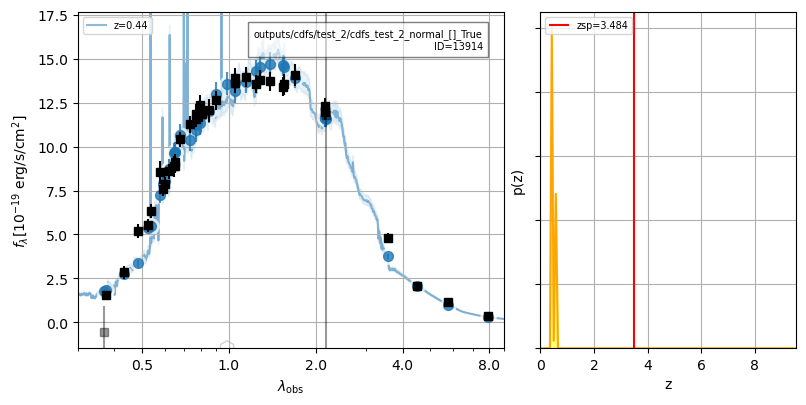

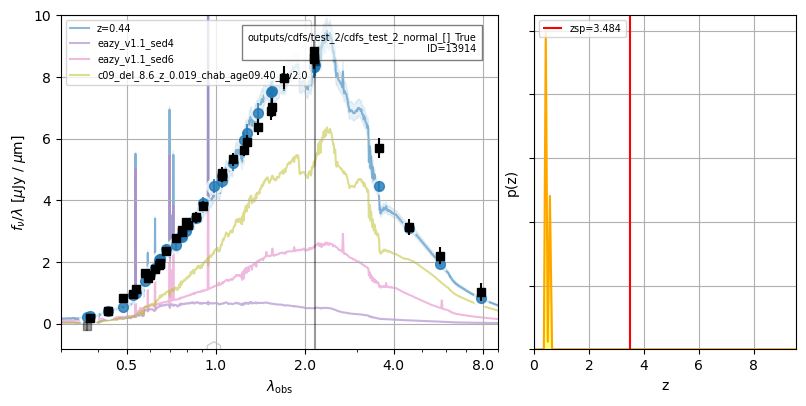

In [60]:
# plot h5 file

idf = self.cat['id']
id = 13913
print(f'the object is: {idf[id]}')
view = eazy.hdf5.Viewer(h5_file)
sv = view.show_fit(idf[id])
sv = view.show_fit(idf[id], show_fnu=2, show_components=True)